# Proyek Analisis Sentimen 
- **Nama:** Muhammad Aldy Naufal Fadhilah
- **Email:** aldy.naufal02@gmail.com
- **ID Dicoding:** aldy_naufal

## Import Library

In [26]:
import nltk
from nltk.sentiment.vader import SentimentIntensityAnalyzer
nltk.download('vader_lexicon')
import pandas as pd

import re
import string
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer
import nltk

# Download resources needed for nltk (only run once)
nltk.download('punkt')
nltk.download('stopwords')
nltk.download('wordnet')




from spellchecker import SpellChecker
from wordcloud import WordCloud
import matplotlib.pyplot as plt


from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.feature_extraction.text import CountVectorizer
from gensim.models import Word2Vec
import numpy as np

from sklearn.utils import resample

from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report

[nltk_data] Downloading package vader_lexicon to
[nltk_data]     C:\Users\FX506\AppData\Roaming\nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\FX506\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\FX506\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\FX506\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


## Preprocessing Data

In [ ]:

data = pd.read_csv("data/netflix_reviews.csv")

Review Text    0
Score          0
Date           0
User           0
dtype: int64

In [3]:
slangwords_en = {
    "u": "you", "ur": "your", "r": "are", "b4": "before", "gr8": "great",
    "idk": "i don't know", "lol": "laugh out loud", "omg": "oh my god",
    "brb": "be right back", "btw": "by the way", "lmk": "let me know",
    "tbh": "to be honest", "smh": "shaking my head", "imo": "in my opinion",
    "imho": "in my humble opinion", "thx": "thanks", "ty": "thank you",
    "np": "no problem", "afaik": "as far as i know", "asap": "as soon as possible",
    "bff": "best friend forever", "dm": "direct message", "jk": "just kidding",
    "nvm": "never mind", "omw": "on my way", "rofl": "rolling on the floor laughing",
    "ttyl": "talk to you later", "ya": "yeah", "bc": "because", "cya": "see you",
    "tho": "though", "pls": "please", "plz": "please", "wanna": "want to",
    "gonna": "going to", "gotta": "got to", "lemme": "let me", "kinda": "kind of",
    "dunno": "do not know", "ya'll": "you all", "y'all": "you all", "wassup": "what is up"
}

In [4]:
spell = SpellChecker(language='en')
lemmatizer = WordNetLemmatizer()
stopword_set_en = set(stopwords.words('english'))

# Regex pattern to remove emojis
emoji_pattern = re.compile(
    "["
    u"\U0001F600-\U0001F64F"  # emoticons
    u"\U0001F300-\U0001F5FF"  # symbols & pictographs
    u"\U0001F680-\U0001F6FF"  # transport & map symbols
    u"\U0001F1E0-\U0001F1FF"  # flags (iOS)
    u"\U00002700-\U000027BF"  # Dingbats
    u"\U000024C2-\U0001F251"  # Enclosed characters
    "]+", flags=re.UNICODE
)

def clean_text_en(text):
    text = re.sub(r"http\S+|@\S+|#\S+|RT[\s]+", "", text)  # remove URLs, mentions, hashtags, RT
    text = re.sub(r'\d+', '', text)  # remove numbers
    text = emoji_pattern.sub(r'', text)  # remove emojis
    text = text.translate(str.maketrans('', '', string.punctuation))  # remove punctuation
    return text.lower().strip()

def replace_slang(text, slang_dict):
    return ' '.join([slang_dict.get(word, word) for word in text.split()])

def correct_spelling(text):
    words = text.split()
    corrected = []
    for word in words:
        if word in spell:
            corrected.append(word)
        else:
            correction = spell.correction(word)
            corrected.append(correction if correction else word)
    return ' '.join(corrected)

def lemmatize_tokens(tokens):
    return [lemmatizer.lemmatize(word) for word in tokens]

def preprocess_english(text):
    text = clean_text_en(text)
    text = replace_slang(text, slangwords_en)
    text = correct_spelling(text)
    tokens = word_tokenize(text)
    tokens = [word for word in tokens if word not in stopword_set_en]
    lemmatized = lemmatize_tokens(tokens)
    return ' '.join(lemmatized)


In [5]:
data['Cleaned Review'] = data['Review Text'].apply(preprocess_english)

## Labeling Data

In [6]:
# Inisialisasi analyzer
sia = SentimentIntensityAnalyzer()

def get_sentiment(text):
    sentiment_score = sia.polarity_scores(text)
    compound_score = sentiment_score['compound']
    
    if compound_score >= 0.05:
        return 'Positive'
    elif compound_score <= -0.05:
        return 'Negative'
    else:
        return 'Neutral'

In [7]:
# Terapkan analisis sentimen setelah memastikan datanya aman
data['Sentiment'] = data['Cleaned Review'].apply(get_sentiment)

# Lihat hasil awal
data.head()

,Review Text,Score,Date,User,Cleaned Review,Sentiment
0,I have been denied all things even insulted an...,1,2025-04-15 13:04:42,A Google user,denied thing even insulted assaulted since mom...,Negative
1,not worth it i share my account with my sister...,1,2025-04-15 12:47:41,A Google user,worth share account sister pay half half cant ...,Positive
2,Mantaaaabs... ⭐⭐⭐⭐⭐,5,2025-04-15 12:02:27,A Google user,mantaaaabs,Neutral
3,blthe best aap in India,5,2025-04-15 11:32:45,A Google user,bathe best map india,Positive
4,The brightness controls are useless.,2,2025-04-15 11:24:44,A Google user,brightness control useless,Negative


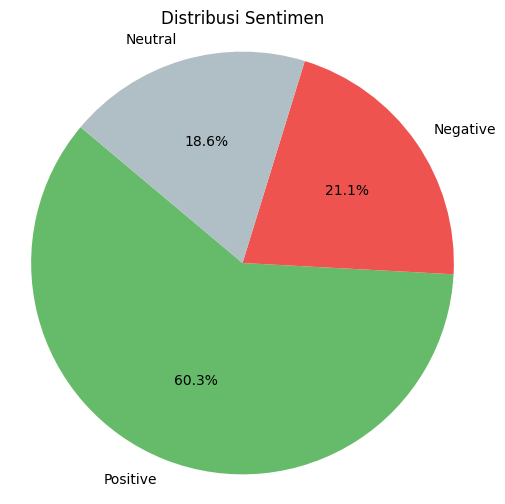

Sentiment
Positive    6026
Negative    2109
Neutral     1865
Name: count, dtype: int64


In [25]:
# Hitung jumlah label
sentiment_counts = data['Sentiment'].value_counts()

# Tentukan warna untuk tiap label
colors = {
    'Positive': '#66bb6a',  # hijau
    'Neutral': '#b0bec5',   # abu-abu
    'Negative': '#ef5350'   # merah
}

# Ambil warna sesuai urutan label pada indeks
label_order = sentiment_counts.index
color_list = [colors[label] for label in label_order]

# Pie chart
plt.figure(figsize=(6, 6))
plt.pie(
    sentiment_counts,
    labels=label_order,
    autopct='%1.1f%%',
    startangle=140,
    colors=color_list
)
plt.title('Distribusi Sentimen')
plt.axis('equal')
plt.show()

# Cek distribusi awal
sentiment_counts = data['Sentiment'].value_counts()
print(sentiment_counts)

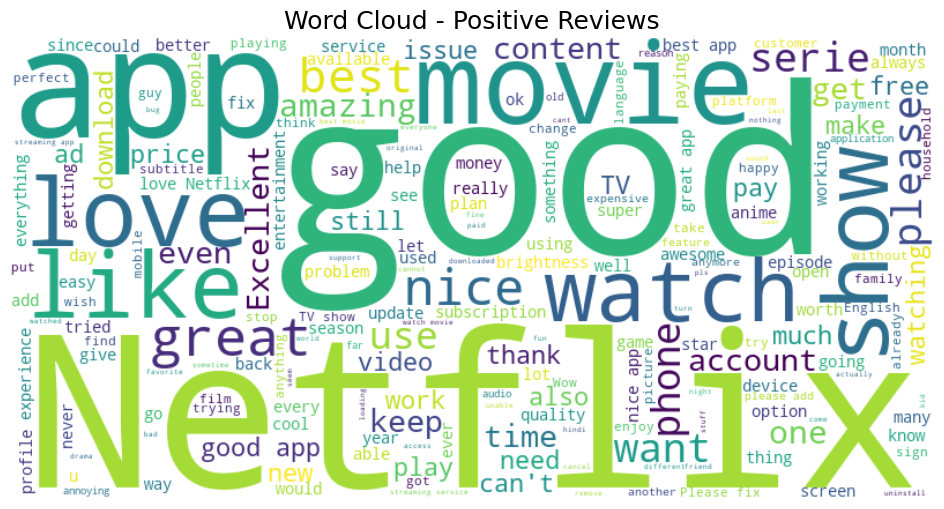

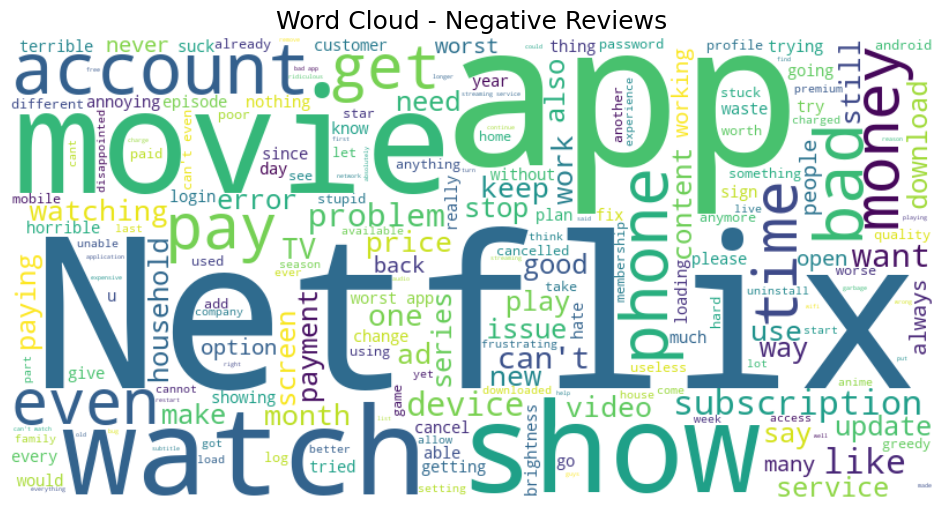

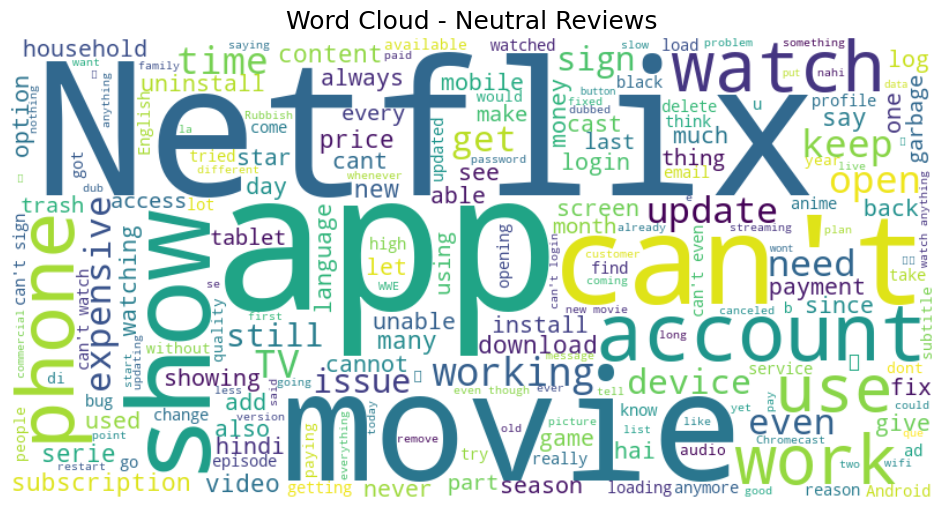

In [10]:
# Fungsi bantu untuk menampilkan word cloud berdasarkan kategori
def generate_sentiment_wordcloud(df, sentiment_label, title):
    text = ' '.join(df[df['Sentiment'] == sentiment_label]['Review Text'].dropna())
    wordcloud = WordCloud(
        width=800,
        height=400,
        background_color='white',
        stopwords=stopword_set_en  # bisa juga pakai set(stopwords.words('english'))
    ).generate(text)
    
    plt.figure(figsize=(12, 6))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis('off')
    plt.title(title, fontsize=18)
    plt.show()

# Generate WordCloud untuk tiap sentimen
generate_sentiment_wordcloud(data, 'Positive', 'Word Cloud - Positive Reviews')
generate_sentiment_wordcloud(data, 'Negative', 'Word Cloud - Negative Reviews')
generate_sentiment_wordcloud(data, 'Neutral', 'Word Cloud - Neutral Reviews')


In [27]:
# Misal data kamu ada di variabel 'data' dan kolom labelnya 'Sentiment'
positive = data[data['Sentiment'] == 'Positive']
negative = data[data['Sentiment'] == 'Negative']
neutral = data[data['Sentiment'] == 'Neutral']

# Target jumlah sample yang ingin disamakan (jumlah Positive)
target_count = len(positive)

# Oversample Negative
negative_oversampled = resample(negative,
                                replace=True,
                                n_samples=target_count,
                                random_state=42)

# Oversample Neutral
neutral_oversampled = resample(neutral,
                               replace=True,
                               n_samples=target_count,
                               random_state=42)

# Gabungkan semua data
data_balanced = pd.concat([positive, negative_oversampled, neutral_oversampled])

# Acak ulang agar tidak urut berdasarkan label
data_balanced = data_balanced.sample(frac=1, random_state=42).reset_index(drop=True)

# Cek distribusi baru
print(data_balanced['Sentiment'].value_counts())

Sentiment
Neutral     6026
Positive    6026
Negative    6026
Name: count, dtype: int64


## Features Ekstraction 

In [28]:
tfidf_vectorizer = TfidfVectorizer(max_features=5000)
X_tfidf = tfidf_vectorizer.fit_transform(data_balanced['Cleaned Review'])

In [29]:
bow_vectorizer = CountVectorizer(max_features=5000)
X_bow = bow_vectorizer.fit_transform(data_balanced['Cleaned Review'])

In [30]:
data_balanced['Tokens'] = data_balanced['Cleaned Review'].apply(word_tokenize)

# Latih Word2Vec model sendiri
w2v_model = Word2Vec(sentences=data_balanced['Tokens'], vector_size=100, window=5, min_count=2, workers=4)

# Fungsi untuk ambil rata-rata vektor dari token
def get_w2v_vector(tokens):
    vectors = []
    for word in tokens:
        if word in w2v_model.wv:
            vectors.append(w2v_model.wv[word])
    if vectors:
        return np.mean(vectors, axis=0)
    else:
        return np.zeros(w2v_model.vector_size)

# Ekstraksi fitur W2V
X_w2v = np.array(data_balanced['Tokens'].apply(get_w2v_vector).tolist())

## Splitting Data

In [31]:
X_train_tfidf, X_test_tfidf, y_train_tfidf, y_test_tfidf = train_test_split(X_tfidf, data_balanced['Sentiment'], test_size=0.2, random_state=42)

In [32]:
X_train_bow, X_test_bow, y_train_bow, y_test_bow = train_test_split(X_bow, data_balanced['Sentiment'], test_size=0.2, random_state=42)

## Modeling Data

In [33]:
model_rand_tfidf = RandomForestClassifier()
model_rand_tfidf.fit(X_train_tfidf, y_train_tfidf)
y_pred_rand_tfidf = model_rand_tfidf.predict(X_test_tfidf)

print(classification_report(y_test_tfidf, y_pred_rand_tfidf))

              precision    recall  f1-score   support

    Negative       0.91      0.97      0.94      1222
     Neutral       0.96      0.99      0.98      1227
    Positive       0.98      0.88      0.93      1167

    accuracy                           0.95      3616
   macro avg       0.95      0.95      0.95      3616
weighted avg       0.95      0.95      0.95      3616



In [34]:
model_rand_bow = RandomForestClassifier()
model_rand_bow.fit(X_train_bow, y_train_bow)
y_pred_rand_bow = model_rand_tfidf.predict(X_test_bow)

print(classification_report(y_test_bow, y_pred_rand_bow))

              precision    recall  f1-score   support

    Negative       0.96      0.84      0.89      1222
     Neutral       0.83      0.99      0.90      1227
    Positive       0.96      0.88      0.92      1167

    accuracy                           0.90      3616
   macro avg       0.91      0.90      0.90      3616
weighted avg       0.91      0.90      0.90      3616



## Evaluation